In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
import glob
from PIL import Image
import numpy as np

all_images = []
all_labels = []
filenames = []
ages = []
img_size = (80, 100)
for f in glob.glob('..\\data\\xray\\**\\*.jpg', recursive=True):
    arr = f.split('\\')
    arr2 = arr[3].split("_")
    if arr2[1] == 'M':
        img = Image.open(f)
        filenames.append(arr[-1])
        img_resize = img.resize((img_size[0], img_size[1]))
        all_images.append(img_resize)
        age = int(arr2[2].replace('yr', ''))
        ages.append(age)

In [8]:
filenames[:10]

['332_M.jpg',
 '333_M.jpg',
 '334_M.jpg',
 '335_M.jpg',
 '336_M.jpg',
 '337_M.jpg',
 '338_M.jpg',
 '339_M.jpg',
 '340_M.jpg',
 '341_M.jpg']

In [9]:
items=list(zip(filenames,ages,all_images))
items[:10]

[('332_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('333_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('334_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('335_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('336_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('337_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('338_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('339_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('340_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('341_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>)]

In [10]:
len(all_images)

665

In [11]:
np.array(all_images[0]).shape

(100, 80, 3)

In [12]:
X = np.empty((1,img_size[0],img_size[1],3))
for img in all_images:
    X = np.vstack((X,np.array(img).reshape(1,img_size[0],img_size[1],3)))
X.shape

(666, 80, 100, 3)

In [13]:
X = np.delete(X, (0), axis=0)

In [14]:
X.shape

(665, 80, 100, 3)

In [15]:
y = np.array(ages)
y[:10]

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

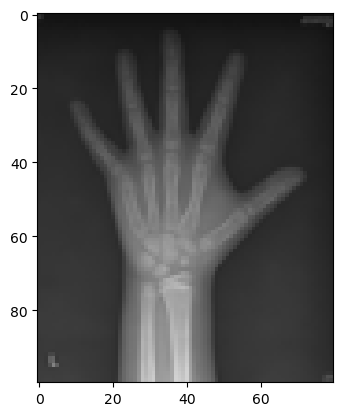

In [16]:
import matplotlib.pyplot as plt
plt.imshow(all_images[0])
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((532, 80, 100, 3), (133, 80, 100, 3), (532,), (133,))

In [ ]:
import pandas as pd
pd.DataFrame(y_train).value_counts()